# 11.2. Tilburg area development case

Python code for the Tilburg area development case ([Chapter 9.1](https://teachbooks.github.io/systems-engineering-design/main/chapters/chapter_9_1.html)). 
Python code for the shopping mall design problem revisited non-linear example ([Chapter 7.2](https://teachbooks.github.io/systems-engineering-design/main/chapters/chapter_7_2.html)).

```{note}
Press the rocket symbol on the top right of the page to make the page interactive and play with the code! 
``` 

## Import Packages

This script is fairly similar to the non-linear shopping mall example. Only the preference functions for objective 1 and 2 are changed, together with the weights.

Note that the non-linear preference curves are created by using an interpolation function called pchip_interpolation.


In [ ]:
# import micropip
# await micropip.install("urllib3 ")
# await micropip.install("requests")

import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

from genetic_algorithm_pfm import GeneticAlgorithm

## Set Weights for Different Objectives

Set weights for the different objectives.

In [8]:
w1 = 1/6
w2 = 1/6
w3 = 1/6
w4 = 1/6
w5 = 1/6
w6 = 1/6

def objective_p1(h1, h2, h3, o, c, s):
    """
    Objective to maximize the profit preference.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    :param x3: 3rd design variable
    :param x4: 4th design variable
    :param x5: 5th design variable
    :param x6: 6th design variable
    """
    return pchip_interpolate([80, 130, 180], [0, 30, 100], (h1))


def objective_p2(h1, h2, h3, o, c, s):
    """
    Objective to maximize the amount of affordable houses preference.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    :param x3: 3rd design variable
    :param x4: 4th design variable
    :param x5: 5th design variable
    :param x6: 6th design variable
    """
    return pchip_interpolate([60, 120, 140], [0, 30, 100], (h2))

def objective_p3(h1, h2, h3, o, c, s):
    """
    Objective to maximize the profit preference.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    :param x3: 3rd design variable
    :param x4: 4th design variable
    :param x5: 5th design variable
    :param x6: 6th design variable
    """
    return pchip_interpolate([60, 70, 80], [0, 50, 100], (h3))


def objective_p4(h1, h2, h3, o, c, s):
    """
    Objective to maximize the amount of affordable houses preference.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    :param x3: 3rd design variable
    :param x4: 4th design variable
    :param x5: 5th design variable
    :param x6: 6th design variable
    """
    return pchip_interpolate([28, 29, 40], [100, 10, 0], (o))


def objective_p5(h1, h2, h3, o, c, s):
    """
    Objective to maximize the profit preference.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    :param x3: 3rd design variable
    :param x4: 4th design variable
    :param x5: 5th design variable
    :param x6: 6th design variable
    """
    return pchip_interpolate([30, 68, 80], [100, 30, 0], (c))


def objective_p6(h1, h2, h3, o, c, s):
    """
    Objective to maximize the amount of affordable houses preference.

    :param x1: 1st design variable
    :param x2: 2nd design variable
    :param x3: 3rd design variable
    :param x4: 4th design variable
    :param x5: 5th design variable
    :param x6: 6th design variable
    """
    return pchip_interpolate([30, 35, 45], [0, 70, 100], (s))

def objective(variables):
    """
    Objective function that is fed to the GA. Calles the separate preference functions that are declared above.

    :param variables: array with design variable values per member of the population. Can be split by using array
    slicing
    :return: 1D-array with aggregated preference scores for the members of the population.
    """
    # extract 1D design variable arrays from full 'variables' array
    h1 = variables[:, 0]
    h2 = variables[:, 1]
    h3 = variables[:, 2]
    o  = variables[:, 3]
    c  = variables[:, 4]
    s  = variables[:, 5]

    # calculate the preference scores
    p_1 = objective_p1(h1, h2, h3, o, c, s)
    p_2 = objective_p2(h1, h2, h3, o, c, s)
    p_3 = objective_p3(h1, h2, h3, o, c, s)
    p_4 = objective_p4(h1, h2, h3, o, c, s)
    p_5 = objective_p5(h1, h2, h3, o, c, s)
    p_6 = objective_p6(h1, h2, h3, o, c, s)

    # aggregate preference scores and return this to the GA
    return [w1, w2, w3, w4, w5, w6], [p_1, p_2, p_3, p_4, p_5, p_6]

## Define Constraints and Bounds

Before we can run the optimization, we finally need to define the constraints and bounds.

In [9]:
def constraint_1(variables):
    """Constraint that checks if the sum of the areas x1 and x2 is not higher than 10,000 m2.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    h1 = variables[:, 0]
    h2 = variables[:, 1]
    h3 = variables[:, 2]
    o  = variables[:, 3] * 1000
    c  = variables[:, 4] * 1000
    s  = variables[:, 5] / 100

    return .1 * (100 * h1) + .17 * (80 * h2) + .2 * (120 * h3) + .1 * o + .25 * (40 * h1 + 35 * h2 + 28 * h3) + .33 * c + 100500 * s + 40 * h1 + 40 * h2 + 28 * h3 + .3 * (o + (40 * h1 + 35 * h2 + 28 * h3) + c ) - 100500  # < 0


def constraint_2(variables):
    """Constraint that checks if the sum of the areas x1 and x2 is not lower than 3,000 m2.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    h1 = variables[:, 0]
    h2 = variables[:, 1]
    h3 = variables[:, 2]
    o  = variables[:, 3] * 1000
    c  = variables[:, 4] * 1000
    s  = variables[:, 5] / 100

    return 85 * h1 + 85 * h2 + 75 * h3 - 100500 * s  # < 0

# define list with constraints
cons = [['ineq', constraint_1]]

# set bounds for all variables
b1 = [80, 180]  # x1
b2 = [60, 140]  # x2
b3 = [60, 80]  # x3
b4 = [28, 40]  # x4
b5 = [30, 80]  # x5
b6 = [30, 45]  # x6
bounds = [b1, b2, b3, b4, b5, b6]


## Graphical Output

Setup the graphical output.

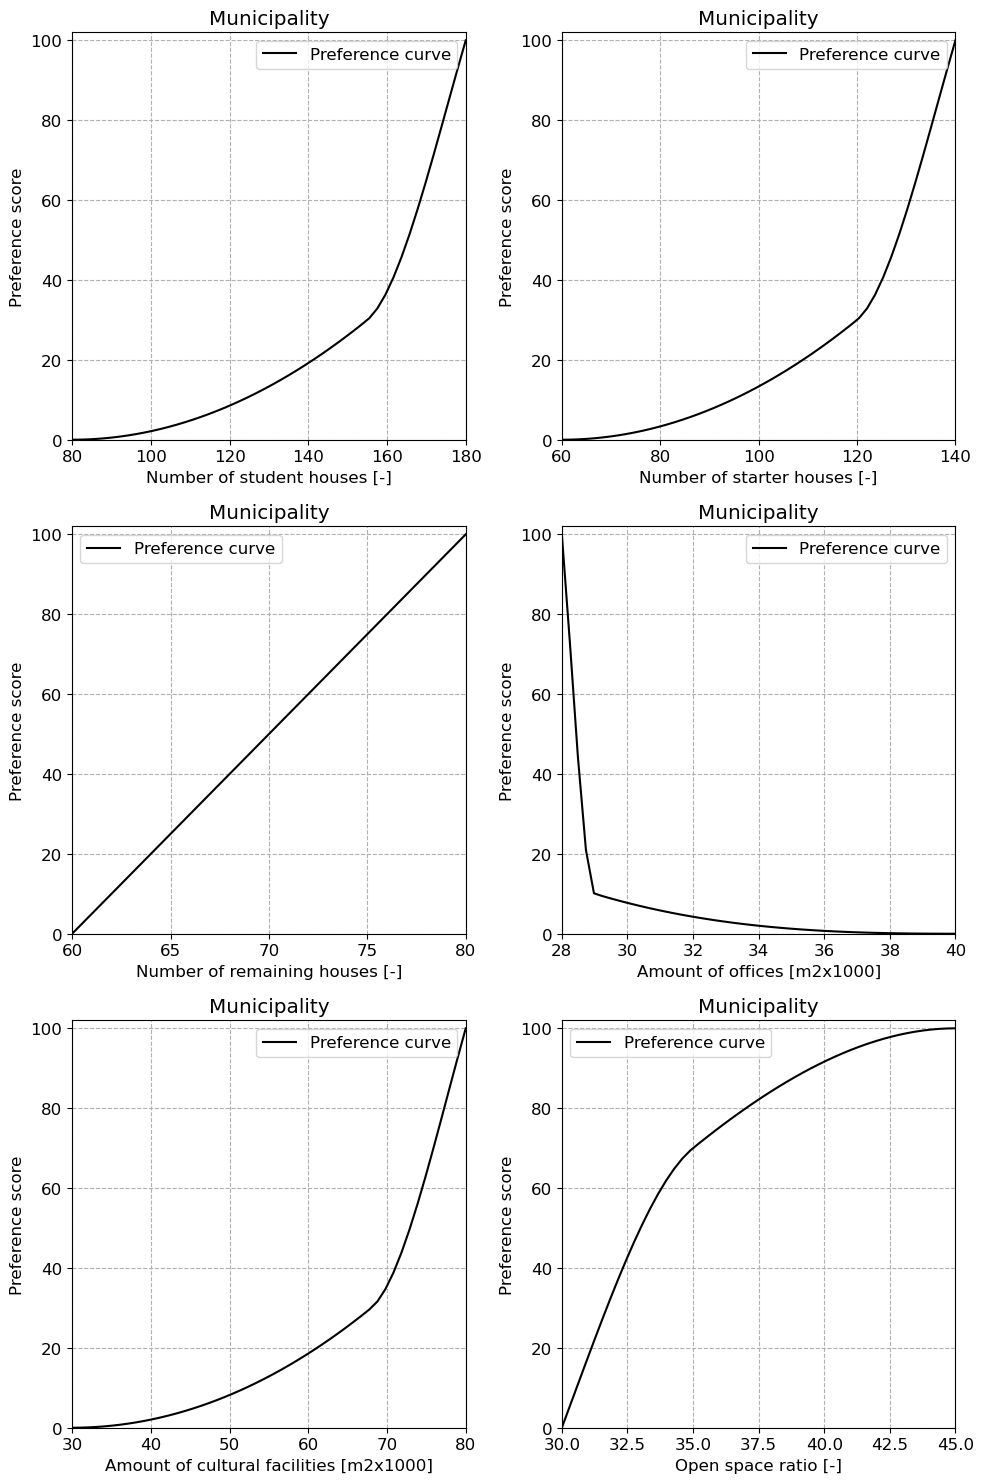

In [10]:
# create arrays for plotting continuous preference curves
c1 = np.linspace(80, 180)
c2 = np.linspace(60, 140)
c3 = np.linspace(60, 80)
c4 = np.linspace(28, 40)
c5 = np.linspace(30, 80)
c6 = np.linspace(30, 45)

# calculate the preference functions
p1 = pchip_interpolate([80, 155, 180], [0, 30, 100], (c1))
p2 = pchip_interpolate([60, 120, 140], [0, 30, 100], (c2))
p3 = pchip_interpolate([60, 70, 80], [0, 50, 100], (c3))
p4 = pchip_interpolate([28, 29, 40], [100, 10, 0], (c4))
p5 = pchip_interpolate([30, 68, 80], [0, 30, 100], (c5))
p6 = pchip_interpolate([30, 35, 45], [0, 70, 100], (c6))

# create figure that plots all preference curves and the preference scores of the returned results of the GA
fig = plt.figure(figsize=((10,15)))

font1 = {'size':20}
font2 = {'size':15}

plt.rcParams['font.size'] = '12'
plt.rcParams['savefig.dpi'] = 300

ax1 = fig.add_subplot(3, 2, 1)
ax1.plot(c1, p1, label='Preference curve', color='black')
ax1.set_xlim((80, 180))
ax1.set_ylim((0, 102))
ax1.set_title('Municipality')
ax1.set_xlabel('Number of student houses [-]')
ax1.set_ylabel('Preference score')
ax1.grid()
ax1.legend()
ax1.grid(linestyle = '--')

ax2 = fig.add_subplot(3, 2, 2)
ax2.plot(c2, p2, label='Preference curve', color='black')
ax2.set_xlim((60, 140))
ax2.set_ylim((0, 102))
ax2.set_title('Municipality')
ax2.set_xlabel('Number of starter houses [-]')
ax2.set_ylabel('Preference score')
ax2.grid()
ax2.legend()
ax2.grid(linestyle = '--')

ax3 = fig.add_subplot(3, 2, 3)
ax3.plot(c3, p3, label='Preference curve', color='black')
ax3.set_xlim((60, 80))
ax3.set_ylim((0, 102))
ax3.set_title('Municipality')
ax3.set_xlabel('Number of remaining houses [-]')
ax3.set_ylabel('Preference score')
ax3.grid()
ax3.legend()
ax3.grid(linestyle = '--')

#fig = plt.figure()
ax4 = fig.add_subplot(3, 2, 4)
ax4.plot(c4, p4, label='Preference curve', color='black')
ax4.set_xlim((28, 40))
ax4.set_ylim((0, 102))
ax4.set_title('Municipality')
ax4.set_xlabel('Amount of offices [m2x1000]')
ax4.set_ylabel('Preference score')
ax4.grid()
ax4.legend()
ax4.grid(linestyle = '--')


ax5 = fig.add_subplot(3, 2, 5)
ax5.plot(c5, p5, label='Preference curve', color='black')
ax5.set_xlim((30, 80))
ax5.set_ylim((0, 102))
ax5.set_title('Municipality')
ax5.set_xlabel('Amount of cultural facilities [m2x1000]')
ax5.set_ylabel('Preference score')
ax5.grid()
ax5.legend()
ax5.grid(linestyle = '--')

#fig = plt.figure()
ax6 = fig.add_subplot(3, 2, 6)
ax6.plot(c6, p6, label='Preference curve', color='black')
ax6.set_xlim((30, 45))
ax6.set_ylim((0, 102))
ax6.set_title('Municipality')
ax6.set_xlabel('Open space ratio [-]')
ax6.set_ylabel('Preference score')
ax6.grid()
ax6.legend()
ax6.grid(linestyle = '--')

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

fig.tight_layout()



## Optimization

Now we have everything for the optimization, we can run it. For more information about the different options to configure the GA, see the docstring of GeneticAlgorithm (via help()) or chapter 4 of the reader. 

Once we have the results, we can make some figures. First, the resulting design variables are plotted into the solution space. Secondly, we can plot the preference functions together with the results of the optimizations.


Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            12.7913      734000004.3408   0            0.003        367         
1            11.6111      152000012.1091   0            0.062        76          
2            10.3516      78000011.2888    0            0.123        39          
3            9.2537       26000010.6148    0            0.15         13          
4            5.0175       18000009.723     0            0.157        9           
5            3.4554       22000006.3103    0            0.16         11          
6            3.1002       42000004.4105    0            0.155        21          
7            3.1002       28000003.9718    1            0.16         14          
8            3.0138       22000003.8417    0            0.159        11          
9            3.0138       32000003.8256    1            0.157        16          
10           3.0138 

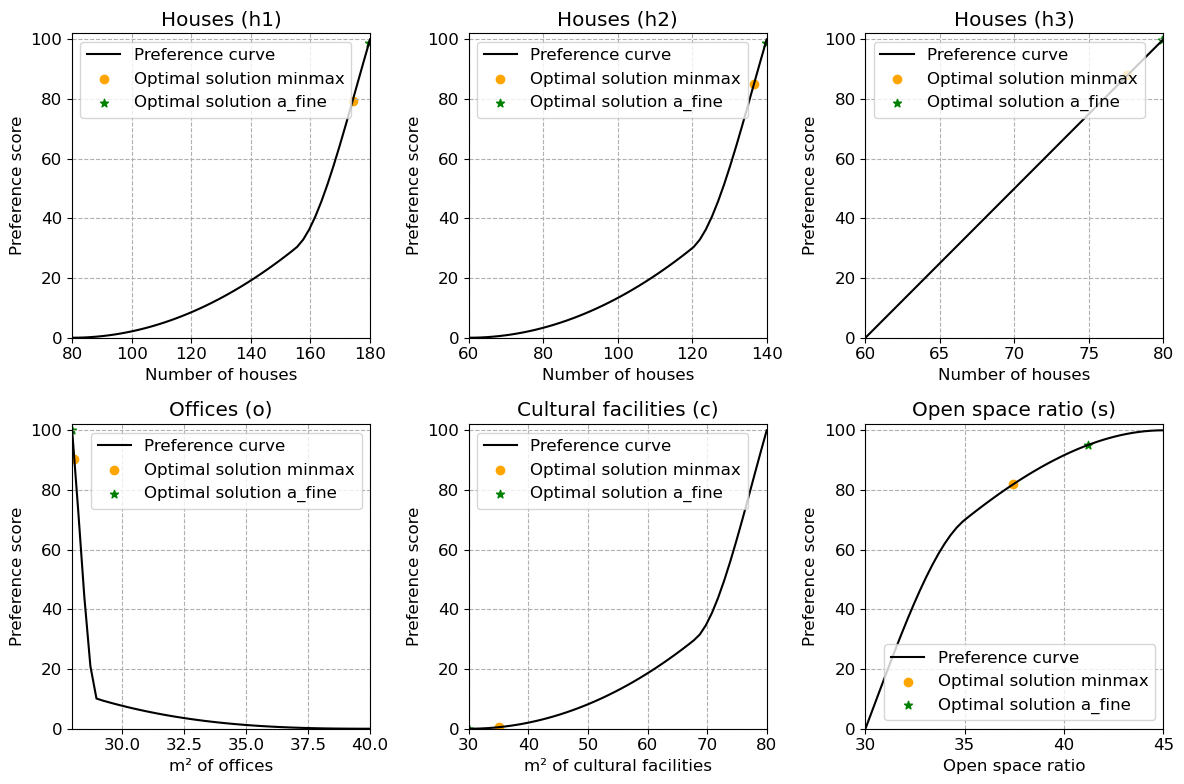

In [ ]:
# We run the optimization with two paradigms
paradigm = ['minmax', 'tetra']
marker = ['o', '*']
colours = ['orange', 'green']

# Define the figure and axes before the loop
fig = plt.figure(figsize=(12, 8))

# Creating six subplots for the six preference scores
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

for i in range(2):
    # Dictionary with parameter settings for the GA run with the IMAP solver
    options = {
        'n_bits': 8,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 8,
        'aggregation': paradigm[i],  # minmax or a_fine
        'var_type': 'real'
    }

    # Run the GA and print its result
    print(f'Run GA with {paradigm[i]}')
    ga = GeneticAlgorithm(objective=objective, constraints=cons, bounds=bounds, options=options)
    score_IMAP, design_variables_IMAP, _ = ga.run()

    # Print the optimal result in a readable format
    print(f'Optimal result for h1 = {round(design_variables_IMAP[0], 2)} houses and ' 
          f'h2 = {round(design_variables_IMAP[1], 2)} houses and ' 
          f'h3 = {round(design_variables_IMAP[2], 2)} houses and ' 
          f'o = {round(design_variables_IMAP[3], 2)} m² offices and ' 
          f'c = {round(design_variables_IMAP[4], 2)} m² cultural facilities and ' 
          f's = {round(design_variables_IMAP[5], 2)} open space ratio')

    # Calculate individual preference scores for the results
    c1_res = design_variables_IMAP[0]
    p1_res = pchip_interpolate([80, 155, 180], [0, 30, 100], c1_res)

    c2_res = design_variables_IMAP[1]
    p2_res = pchip_interpolate([60, 120, 140], [0, 30, 100], c2_res)

    c3_res = design_variables_IMAP[2]
    p3_res = pchip_interpolate([60, 70, 80], [0, 50, 100], c3_res)

    c4_res = design_variables_IMAP[3]
    p4_res = pchip_interpolate([28, 29, 40], [100, 10, 0], c4_res)

    c5_res = design_variables_IMAP[4]
    p5_res = pchip_interpolate([30, 68, 80], [0, 30, 100], c5_res)

    c6_res = design_variables_IMAP[5]
    p6_res = pchip_interpolate([30, 35, 45], [0, 70, 100], c6_res)

    # Debugging prints to check calculated values
    print(f"c1_res: {c1_res}, p1_res: {p1_res}")
    print(f"c2_res: {c2_res}, p2_res: {p2_res}")
    print(f"c3_res: {c3_res}, p3_res: {p3_res}")
    print(f"c4_res: {c4_res}, p4_res: {p4_res}")
    print(f"c5_res: {c5_res}, p5_res: {p5_res}")
    print(f"c6_res: {c6_res}, p6_res: {p6_res}")

    # Plot the preference curves 
    if i == 0:  # Only plot curves once
        # create arrays for plotting continuous preference curves
        c1 = np.linspace(80, 180)
        c2 = np.linspace(60, 140)
        c3 = np.linspace(60, 80)
        c4 = np.linspace(28, 40)
        c5 = np.linspace(30, 80)
        c6 = np.linspace(30, 45)

        # calculate the preference functions
        p1 = pchip_interpolate([80, 155, 180], [0, 30, 100], (c1))
        p2 = pchip_interpolate([60, 120, 140], [0, 30, 100], (c2))
        p3 = pchip_interpolate([60, 70, 80], [0, 50, 100], (c3))
        p4 = pchip_interpolate([28, 29, 40], [100, 10, 0], (c4))
        p5 = pchip_interpolate([30, 68, 80], [0, 30, 100], (c5))
        p6 = pchip_interpolate([30, 35, 45], [0, 70, 100], (c6))

        # Plot each preference curve on the respective subplot (assuming ax1 to ax6 are defined)
        ax1.plot(c1, p1, label='Preference curve', color='black')
        ax1.set_xlim((80, 180))
        ax1.set_ylim((0, 102))
        ax1.set_title('Houses type 1')
        ax1.set_xlabel('Number of houses [-]')
        ax1.set_ylabel('Preference score')
        ax1.grid(linestyle='--')

        ax2.plot(c2, p2, label='Preference curve', color='black')
        ax2.set_xlim((60, 140))
        ax2.set_ylim((0, 102))
        ax2.set_title('Houses type 2')
        ax2.set_xlabel('Number of houses [-]')
        ax2.set_ylabel('Preference score')
        ax2.grid(linestyle='--')

        ax3.plot(c3, p3, label='Preference curve', color='black')
        ax3.set_xlim((60, 80))
        ax3.set_ylim((0, 102))
        ax3.set_title('Houses type 3')
        ax3.set_xlabel('Number of houses [-]')
        ax3.set_ylabel('Preference score')
        ax3.grid(linestyle='--')

        ax4.plot(c4, p4, label='Preference curve', color='black')
        ax4.set_xlim((28, 40))
        ax4.set_ylim((0, 102))
        ax4.set_title('Office space')
        ax4.set_xlabel('m2 of office space')
        ax4.set_ylabel('Preference score')
        ax4.grid(linestyle='--')

        ax5.plot(c5, p5, label='Preference curve', color='black')
        ax5.set_xlim((30, 80))
        ax5.set_ylim((0, 102))
        ax5.set_title('Cultural facilities')
        ax5.set_xlabel('m2 of cultural facilities')
        ax5.set_ylabel('Preference score')
        ax5.grid(linestyle='--')

        ax6.plot(c6, p6, label='Preference curve', color='black')
        ax6.set_xlim((30, 45))
        ax6.set_ylim((0, 102))
        ax6.set_title('Open space ratio')
        ax6.set_xlabel('Open space ratio [-]')
        ax6.set_ylabel('Preference score')
        ax6.grid(linestyle='--')

    # Plot the results on the preference curve subplots
    ax1.scatter(c1_res, p1_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])
    ax2.scatter(c2_res, p2_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])
    ax3.scatter(c3_res, p3_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])
    ax4.scatter(c4_res, p4_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])
    ax5.scatter(c5_res, p5_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])
    ax6.scatter(c6_res, p6_res, label='Optimal solution ' + paradigm[i], color=colours[i], marker=marker[i])

# Add legends and adjust layout after plotting all data points
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()
ax6.legend()

# Set titles and labels for the subplots
ax1.set_title('Houses (h1)')
ax1.set_xlabel('Number of houses')
ax1.set_ylabel('Preference score')

ax2.set_title('Houses (h2)')
ax2.set_xlabel('Number of houses')
ax2.set_ylabel('Preference score')

ax3.set_title('Houses (h3)')
ax3.set_xlabel('Number of houses')
ax3.set_ylabel('Preference score')

ax4.set_title('Offices (o)')
ax4.set_xlabel('m² of offices')
ax4.set_ylabel('Preference score')

ax5.set_title('Cultural facilities (c)')
ax5.set_xlabel('m² of cultural facilities')
ax5.set_ylabel('Preference score')

ax6.set_title('Open space ratio (s)')
ax6.set_xlabel('Open space ratio')
ax6.set_ylabel('Preference score')

# Adjust the layout
fig.tight_layout()

# Display the plot
plt.show()
